In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
folder = "/n/home12/hongwei/HONGWEI/GC_aerosol/OPAC/opac_40b/ERA5_temp/"
ds = xr.open_dataset(folder+"ERA5_2000_temp2.grib", engine="cfgrib")
ds

<xarray.Dataset>
Dimensions:        (isobaricInhPa: 20, latitude: 721, longitude: 1440, time: 144)
Coordinates:
    number         int64 ...
  * time           (time) datetime64[ns] 2000-01-01 ... 2000-12-21T18:00:00
    step           timedelta64[ns] ...
  * isobaricInhPa  (isobaricInhPa) int64 400 350 300 250 225 200 ... 7 5 3 2 1
  * latitude       (latitude) float64 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude      (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time     (time) datetime64[ns] ...
Data variables:
    t              (time, isobaricInhPa, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2022-08-23T11:55:20 GRIB to CDM+CF via cfgrib-0....

In [3]:
temp = ds['t']
del ds
temp

<xarray.DataArray 't' (time: 144, isobaricInhPa: 20, latitude: 721, longitude: 1440)>
[2990131200 values with dtype=float32]
Coordinates:
    number         int64 0
  * time           (time) datetime64[ns] 2000-01-01 ... 2000-12-21T18:00:00
    step           timedelta64[ns] 00:00:00
  * isobaricInhPa  (isobaricInhPa) int64 400 350 300 250 225 200 ... 7 5 3 2 1
  * latitude       (latitude) float64 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude      (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time     (time) datetime64[ns] 2000-01-01 ... 2000-12-21T18:00:00
Attributes:
    GRIB_paramId:                             130
    GRIB_shortName:                           t
    GRIB_units:                               K
    GRIB_name:                                Temperature
    GRIB_cfName:                              air_temperature
    GRIB_cfVarName:                           t
    GRIB_dataType:                            an
    GRIB_missingValue:                        9999
    GRIB_numberOfPoints:                      1038240
    GRIB_totalNumber:                         0
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_NV:                                  0
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    GRIB_gridType:                            regular_ll
    GRIB_gridDefinitionDescription:           Latitude/Longitude Grid
    GRIB_Nx:                                  1440
    GRIB_iDirectionIncrementInDegrees:        0.25
    GRIB_iScansNegatively:                    0
    GRIB_longitudeOfFirstGridPointInDegrees:  0.0
    GRIB_longitudeOfLastGridPointInDegrees:   359.75
    GRIB_Ny:                                  721
    GRIB_jDirectionIncrementInDegrees:        0.25
    GRIB_jPointsAreConsecutive:               0
    GRIB_jScansPositively:                    0
    GRIB_latitudeOfFirstGridPointInDegrees:   90.0
    GRIB_latitudeOfLastGridPointInDegrees:    -90.0
    long_name:                                Temperature
    units:                                    K
    standard_name:                            air_temperature

In [4]:
temp2 = temp[0,:,::10,::20]
# del temp
temp2.shape

(20, 73, 72)

In [5]:
T = np.zeros((20, 73, 72))

for j in tqdm(range(20)):
    for k in range(73):
        T[j,k,:] = temp2[j,k,:]

100%|██████████| 20/20 [01:56<00:00,  5.85s/it]


In [6]:
np.min(T), np.max(T)

(184.07608032226562, 289.8099365234375)

In [7]:
BIN_edge = np.arange(180,310,10)
BIN_mid = np.arange(185,300,10)

print(BIN_edge)
print(BIN_mid)


[180 190 200 210 220 230 240 250 260 270 280 290 300]
[185 195 205 215 225 235 245 255 265 275 285 295]


In [8]:
T = T.flatten()

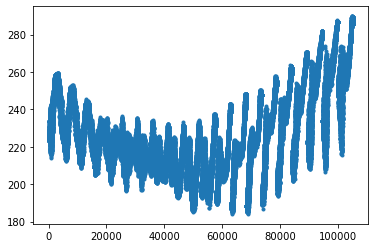

In [9]:
plt.plot(T, '.')

Text(0, 0.5, 'Number')

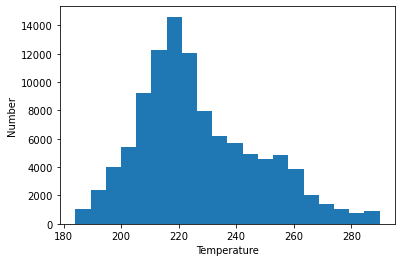

In [11]:
plt.hist(T,bins=20)
plt.xlabel("Temperature")
plt.ylabel("Number");

In [55]:
Section = 1

# --------------------------------------------------------
# Section = 1
# Use this section if you want to test the wet radius's 
# sensitivity to temperautre
# --------------------------------------------------------
if Section==1:
    # Input:
    Den_h2so4 = 1.8 # g/cm³

    tmp = [180,240,290] # temperature [K]
    tmp = np.array(tmp)

    aw = [0.0123, 0.5, 0.7, 0.9, 0.99] # = relative humidity / 100

    # [um]
    Rdry = [0.00039422487,0.0004961,0.0006251,0.0007875,0.0009922,0.0012501,0.0015750,0.0019844,\
        0.0025002,0.0031501,0.0039689,0.0050004,0.0063002,0.0079377,0.0100009,0.0126003,\
        0.0158754,0.0200018,0.0252006,0.0317508,0.0400035,0.0504013,0.0635016,0.0800070,\
        0.1008026,0.1270033,0.1600141,0.2016051,0.2540065,0.3200282,0.4032103,0.5080131,\
        0.6400564,0.8064206,1.0160263,1.2801129,1.6128411,2.0320525,2.5602257,3.2256823]
    Rdry = np.array(Rdry)

In [56]:
# !        calculation of particle density
# !        requires Temperature (temp) and acid mass fraction (so4mfrac)
# !
# !
# !---->Vehkamaeki et al., 2002  (JGR, doi:10.1029/2002JD002184)

def density(temp,so4mfrac):
    
    a1= 0.7681724
    a2= 2.184714
    a3= 7.163002
    a4=-44.31447
    a5= 88.74606
    a6=-75.73729
    a7= 23.43228
    
    b1= 1.808225e-3
    b2=-9.294656e-3
    b3=-3.742148e-2
    b4= 2.565321e-1
    b5=-5.362872e-1
    b6= 4.857736e-1
    b7=-1.629592e-1
     
    c1=-3.478524e-6
    c2= 1.335867e-5
    c3= 5.195706e-5
    c4=-3.717636e-4
    c5= 7.990811e-4
    c6=-7.458060e-4
    c7= 2.581390e-4
    
 
    so4m2=so4mfrac*so4mfrac
    so4m3=so4mfrac*so4m2
    so4m4=so4mfrac*so4m3
    so4m5=so4mfrac*so4m4
    so4m6=so4mfrac*so4m5

    a=a1+a2*so4mfrac+a3*so4m2+a4*so4m3 +a5*so4m4+a6*so4m5+a7*so4m6
    b=b1+b2*so4mfrac+b3*so4m2+b4*so4m3 +b5*so4m4+b6*so4m5+b7*so4m6
    c=c1+c2*so4mfrac+c3*so4m2+c4*so4m3 +c5*so4m4+c6*so4m5+c7*so4m6
      
    density=(a+b*temp+c*temp*temp) # units are g/cm**3
        
    return density

In [57]:
print(f'Rdry={Rdry[:]}')

Rwet = np.zeros((len(tmp), len(aw), len(Rdry)))

for i in range(len(tmp)):
    for k in range(len(aw)):
        
        if abs(aw[k])<1e-10:
            print("The wet radius is same as the dry radius")
            print("Just stop and no need to run the rest!")
            Rwet[i,k,:] = Rdry[:]
            
        else:
            if aw[k]>1.0: aw[k]=1.0
            if aw[k]<=0.05:
                y1=12.372089320*aw[k]**(-0.16125516114) -30.490657554*aw[k] -2.1133114241
                y2=13.455394705*aw[k]**(-0.19213122550) -34.285174607*aw[k] -1.7620073078
            elif aw[k]<=0.85:
                y1=11.820654354*aw[k]**(-0.20786404244) -4.8073063730*aw[k] -5.1727540348
                y2=12.891938068*aw[k]**(-0.23233847708) -6.4261237757*aw[k] -4.9005471319
            else:
                y1=-180.06541028*aw[k]**(-0.38601102592) -93.317846778*aw[k] +273.88132245
                y2=-176.95814097*aw[k]**(-0.36257048154) -90.469744201*aw[k] +267.45509988

            sulfmolal=y1+((tmp[i]-190.)*(y2-y1)/70.)
        
            wp=9800.*sulfmolal/(98.*sulfmolal+1000.) # weight percentage
        
            if wp<15.0: wp=15.0
            if wp>99.0: wp=99.0
            if wp<15.0 or wp>100.0:
                print( 'weight percent= ',wp,  ', T=',tmp[i], ', RH(aw)=', aw[k])
                print('*** Stupid Value of Weight Percent ***')
             
                
            # mass fraction
            wpp=wp*0.01
            # mole fraction
            xa=18.*wpp/(18.*wpp+98.*(1.-wpp))
        
        
            den = density(tmp[i],wpp)
        
        
            Vdry = 4/3 *np.pi * Rdry[:]**3
            Mdry = Den_h2so4*Vdry[:]

            Mwet = Mdry[:]/wpp
            Vwet = Mwet[:]/den
        
            Rwet[i,k,:] = (Vwet[:] / (4/3 *np.pi))**(1/3)
        
            print( f'temp={tmp[i]:.1f}K, RH={aw[k]*100:.1f}%, wp={wp:.3f} %, xa={xa:.3f}, den={den:.3f} gm/cm**3' )
            print(f'Rwet={Rwet[i,k,:]}')
            print('')
    
    

Rdry=[3.9422487e-04 4.9610000e-04 6.2510000e-04 7.8750000e-04 9.9220000e-04
 1.2501000e-03 1.5750000e-03 1.9844000e-03 2.5002000e-03 3.1501000e-03
 3.9689000e-03 5.0004000e-03 6.3002000e-03 7.9377000e-03 1.0000900e-02
 1.2600300e-02 1.5875400e-02 2.0001800e-02 2.5200600e-02 3.1750800e-02
 4.0003500e-02 5.0401300e-02 6.3501600e-02 8.0007000e-02 1.0080260e-01
 1.2700330e-01 1.6001410e-01 2.0160510e-01 2.5400650e-01 3.2002820e-01
 4.0321030e-01 5.0801310e-01 6.4005640e-01 8.0642060e-01 1.0160263e+00
 1.2801129e+00 1.6128411e+00 2.0320525e+00 2.5602257e+00 3.2256823e+00]
temp=180.0K, RH=1.2%, wp=68.047 %, xa=0.281, den=1.700 gm/cm**3
Rwet=[4.56802180e-04 5.74848465e-04 7.24325288e-04 9.12503863e-04
 1.14969693e-03 1.44853470e-03 1.82500773e-03 2.29939386e-03
 2.89706941e-03 3.65013132e-03 4.59890359e-03 5.79413881e-03
 7.30026265e-03 9.19769131e-03 1.15883935e-02 1.46004094e-02
 1.83953826e-02 2.31767870e-02 2.92008188e-02 3.67907653e-02
 4.63534581e-02 5.84017536e-02 7.35815305e-02 9.2706

In [58]:
# Rwet's sensitivity to temp
# Rwet = np.zeros((len(tmp), len(aw), len(Rdry)))

if Section==1:
    Diff = np.zeros(( len(aw), len(Rdry) ))

    for j in range(len(aw)):
        for k in range(len(Rdry)):
            Diff[j,k] = (np.max(Rwet[:,j,k])-np.min(Rwet[:,j,k]))/np.min(Rwet[:,j,k])
        
    print(f"The maximum different is {np.max(Diff*100):.1f}%" )

The maximum different is 5.4%
